<a href="https://colab.research.google.com/github/hari-reddy-008/students-performance-classification/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [93]:
# Importing Datasets
df = pd.read_csv('/content/drive/MyDrive/GDFlix/student-mat.csv')

**Exploring the data**

In [94]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


**Checking for duplicates and null values**

In [95]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [96]:
df.duplicated().sum()

np.int64(0)

In [97]:
# Checking The Datatypes of Each Column
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [98]:
# Checking Unique Values For Categorical Columns
for col in df.select_dtypes(include=['object']).columns:
  print(f"\nUnique Values in '{col}':\n")
  display(df[col].value_counts())


Unique Values in 'school':



,count
school,
GP,349
MS,46



Unique Values in 'sex':



,count
sex,
F,208
M,187



Unique Values in 'address':



,count
address,
U,307
R,88



Unique Values in 'famsize':



,count
famsize,
GT3,281
LE3,114



Unique Values in 'Pstatus':



,count
Pstatus,
T,354
A,41



Unique Values in 'Mjob':



,count
Mjob,
other,141
services,103
at_home,59
teacher,58
health,34



Unique Values in 'Fjob':



,count
Fjob,
other,217
services,111
teacher,29
at_home,20
health,18



Unique Values in 'reason':



,count
reason,
course,145
home,109
reputation,105
other,36



Unique Values in 'guardian':



,count
guardian,
mother,273
father,90
other,32



Unique Values in 'schoolsup':



,count
schoolsup,
no,344
yes,51



Unique Values in 'famsup':



,count
famsup,
yes,242
no,153



Unique Values in 'paid':



,count
paid,
no,214
yes,181



Unique Values in 'activities':



,count
activities,
yes,201
no,194



Unique Values in 'nursery':



,count
nursery,
yes,314
no,81



Unique Values in 'higher':



,count
higher,
yes,375
no,20



Unique Values in 'internet':



,count
internet,
yes,329
no,66



Unique Values in 'romantic':



,count
romantic,
no,263
yes,132


**Performing EDA**

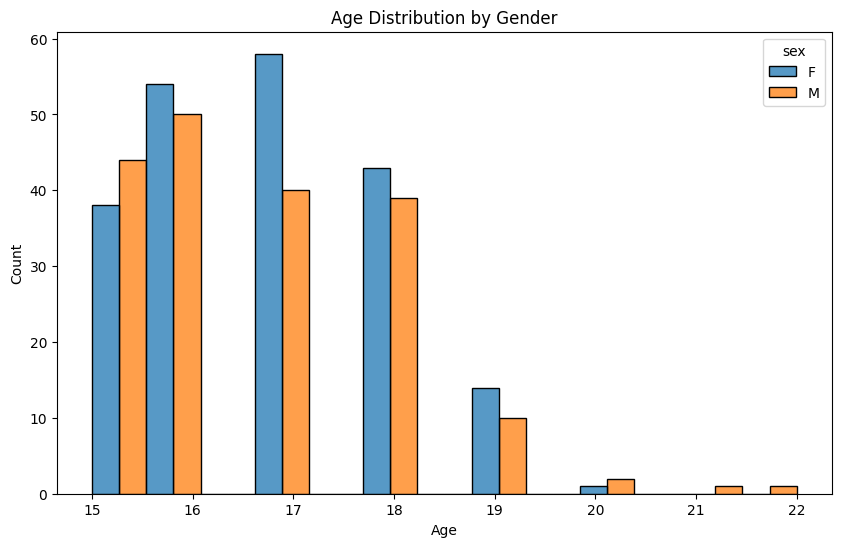

In [99]:
# Checking The Distribution for gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='sex', multiple='dodge')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

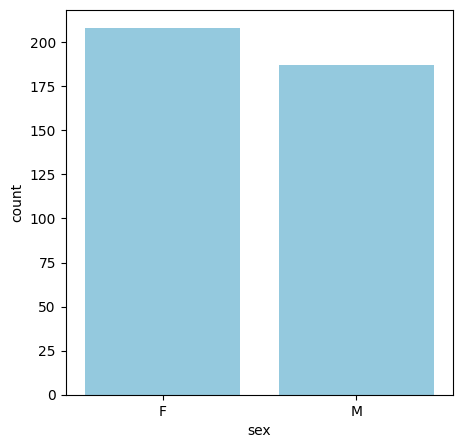

In [100]:
gender_count = df['sex'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(gender_count, color='skyblue')
plt.show()

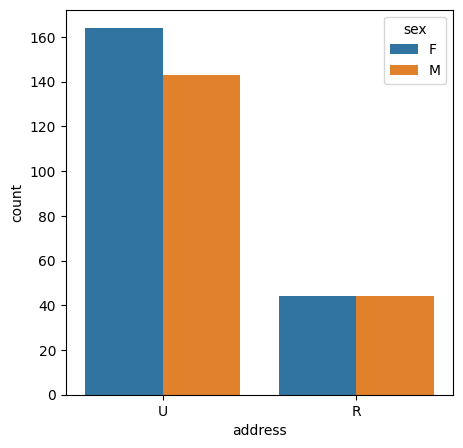

In [101]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='address', hue='sex')
plt.show()

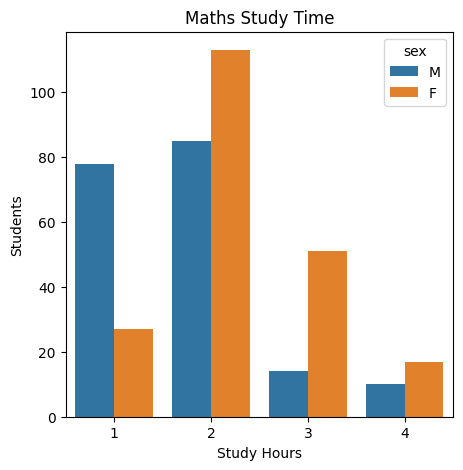

In [102]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='studytime', hue='sex')
plt.title('Maths Study Time')
plt.xlabel('Study Hours')
plt.ylabel('Students')
plt.show()

In [103]:
df['failures'].value_counts()

,count
failures,
0,312
1,50
2,17
3,16


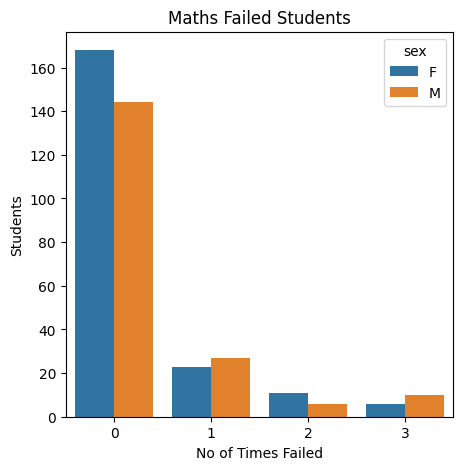

In [104]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='failures', hue='sex')
plt.title('Maths Failed Students')
plt.xlabel('No of Times Failed')
plt.ylabel('Students')
plt.show()

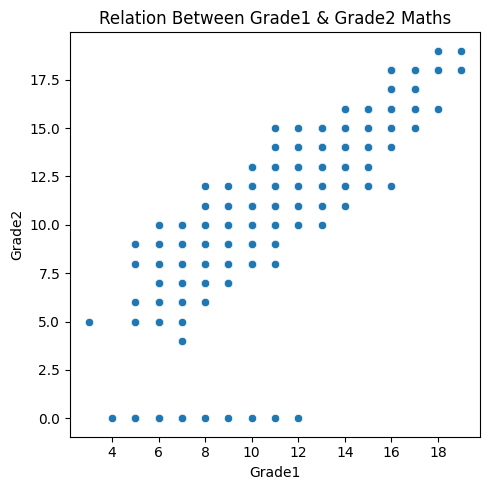

In [105]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x = 'G1', y = 'G2')
plt.title('Relation Between Grade1 & Grade2 Maths')
plt.xlabel('Grade1')
plt.ylabel('Grade2')
plt.tight_layout()
plt.show()

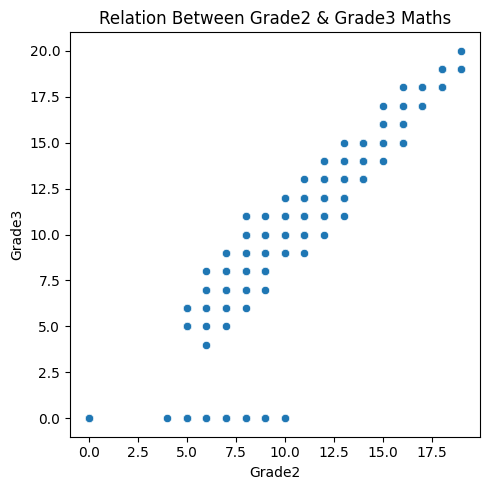

In [106]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x = 'G2', y = 'G3')
plt.title('Relation Between Grade2 & Grade3 Maths')
plt.xlabel('Grade2')
plt.ylabel('Grade3')
plt.tight_layout()
plt.show()

In [107]:
df['Dalc'].value_counts()

,count
Dalc,
1,276
2,75
3,26
5,9
4,9


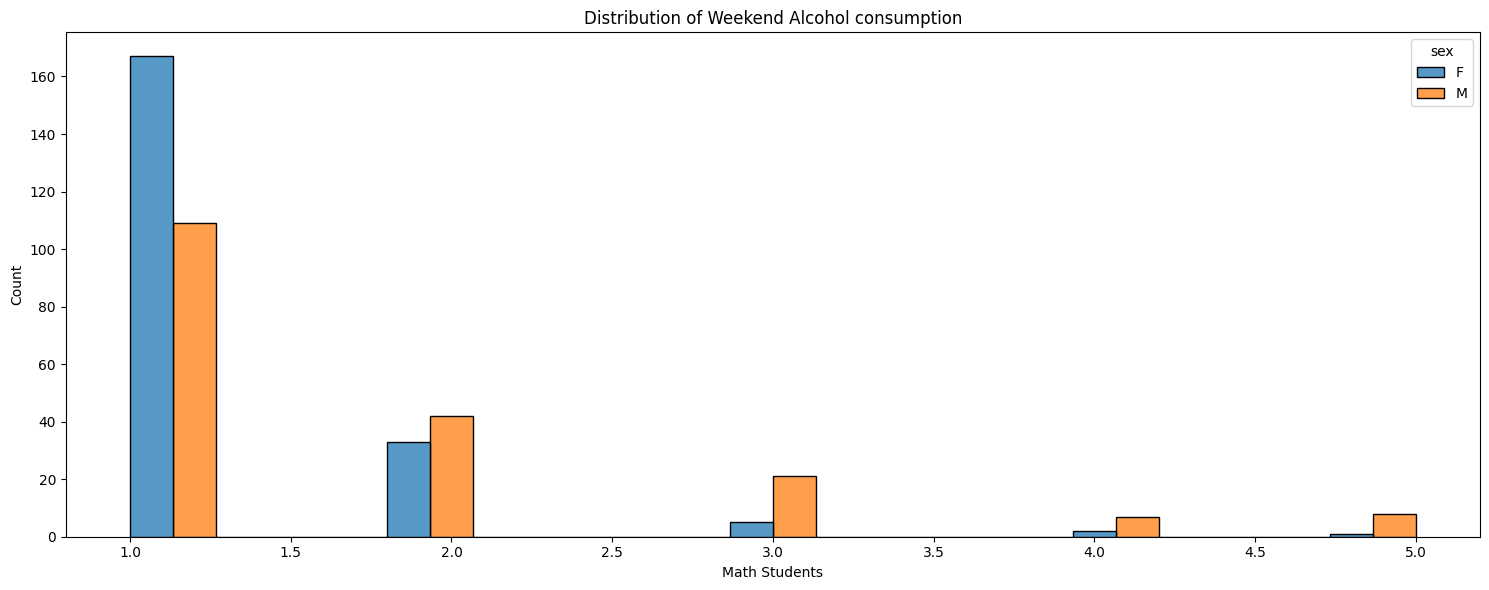

In [108]:
plt.figure(figsize=(15,6))
plt.title('Distribution of Weekend Alcohol consumption')

sns.histplot(data=df, x = 'Dalc', hue='sex',multiple='dodge')
plt.xlabel('Math Students')


plt.tight_layout()
plt.show()



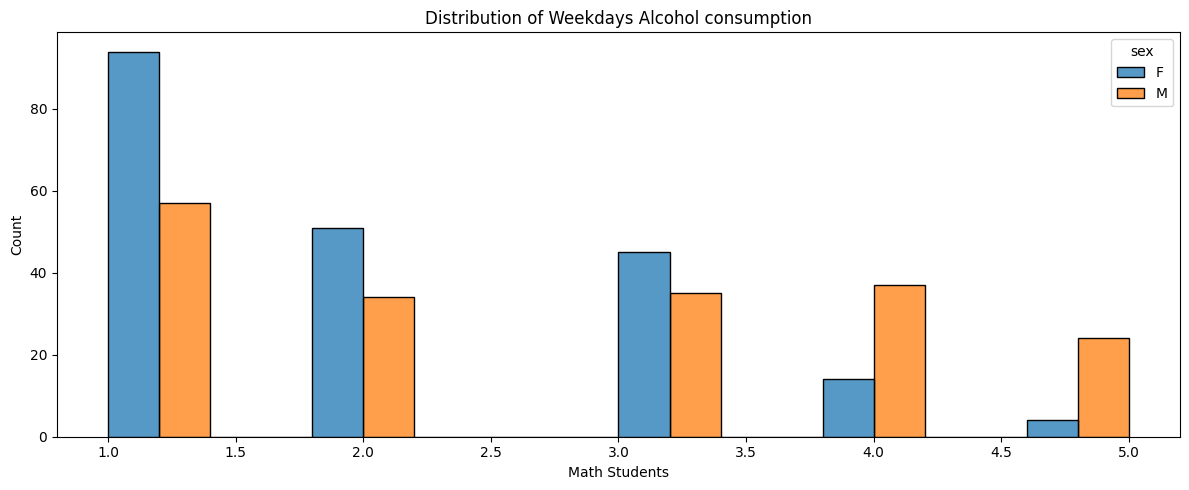

In [109]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Weekdays Alcohol consumption')

sns.histplot(data=df, x = 'Walc', hue='sex', multiple='dodge')
plt.xlabel('Math Students')


plt.tight_layout()
plt.show()


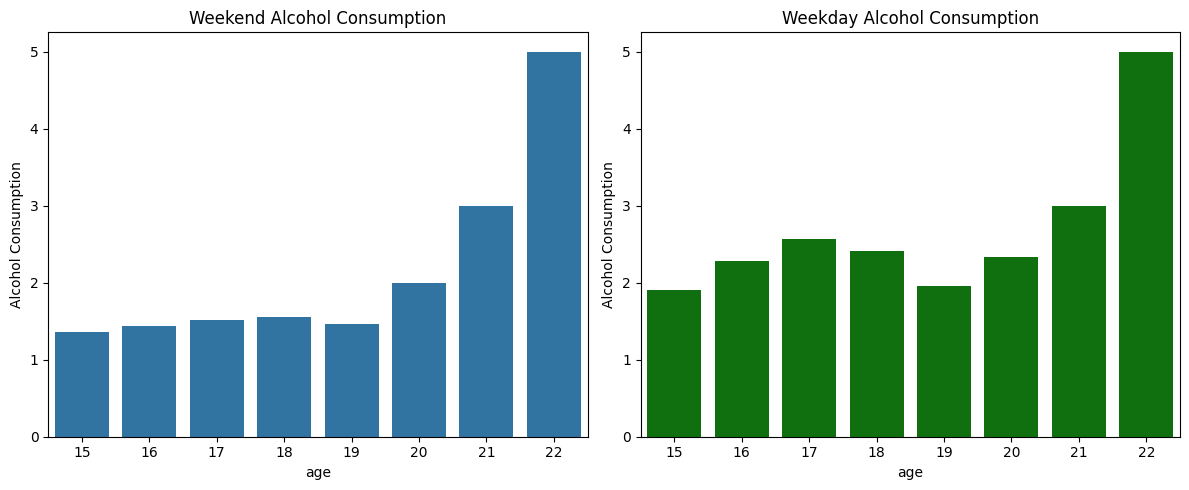

In [110]:
avg_alcohol = df.groupby('age')[['Walc', 'Dalc']].mean()
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data = avg_alcohol, x = 'age', y= avg_alcohol['Dalc'])
plt.title('Weekend Alcohol Consumption')
plt.ylabel('Alcohol Consumption')

plt.subplot(1,2,2)
sns.barplot(data = avg_alcohol, x = 'age', y= avg_alcohol['Walc'], color='green')
plt.title('Weekday Alcohol Consumption')
plt.ylabel('Alcohol Consumption')

plt.tight_layout()
plt.show()

In [111]:
pd.set_option('display.max_columns',None)

In [112]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [113]:
# Seprating The Continuous
cont = df[['age', 'absences', 'G1', 'G2', 'G3']]

In [114]:
cont.describe()

,age,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.908861,10.713924,10.415190
std,1.276043,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,19.000000,19.000000,20.000000


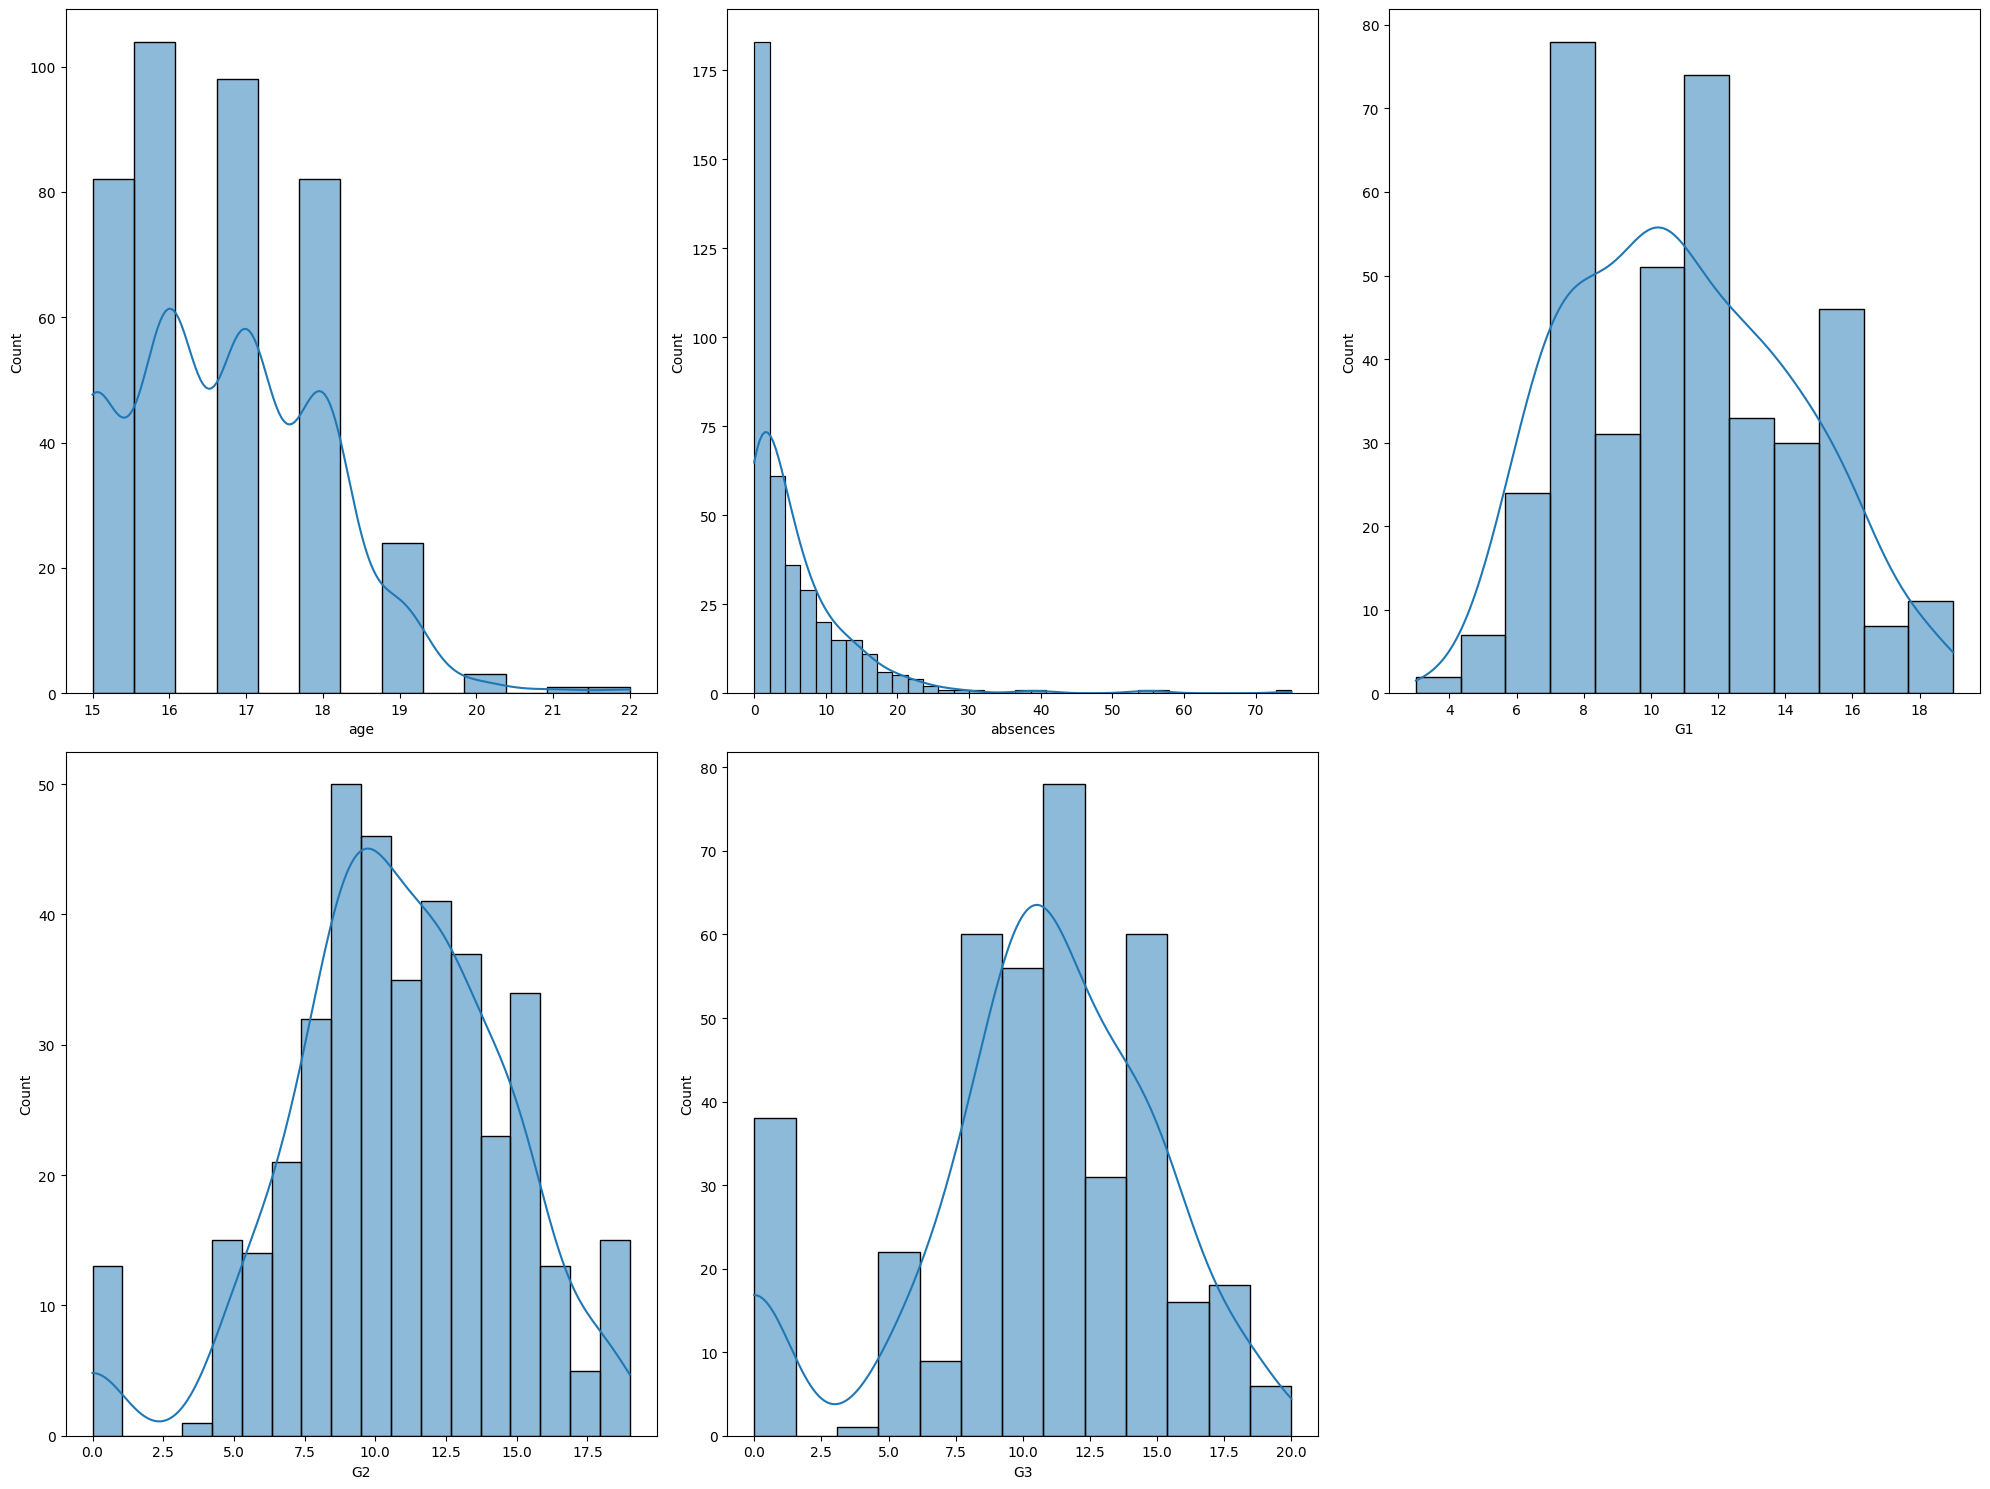

In [115]:
plt.figure(figsize=(20,15))
p = 1
for i in cont:
  if p <= 5:
    plt.subplot(2, 3, p)
    sns.histplot(x = cont[i], kde=True)
    plt.xlabel(i)
    p+=1
plt.tight_layout()
plt.show()

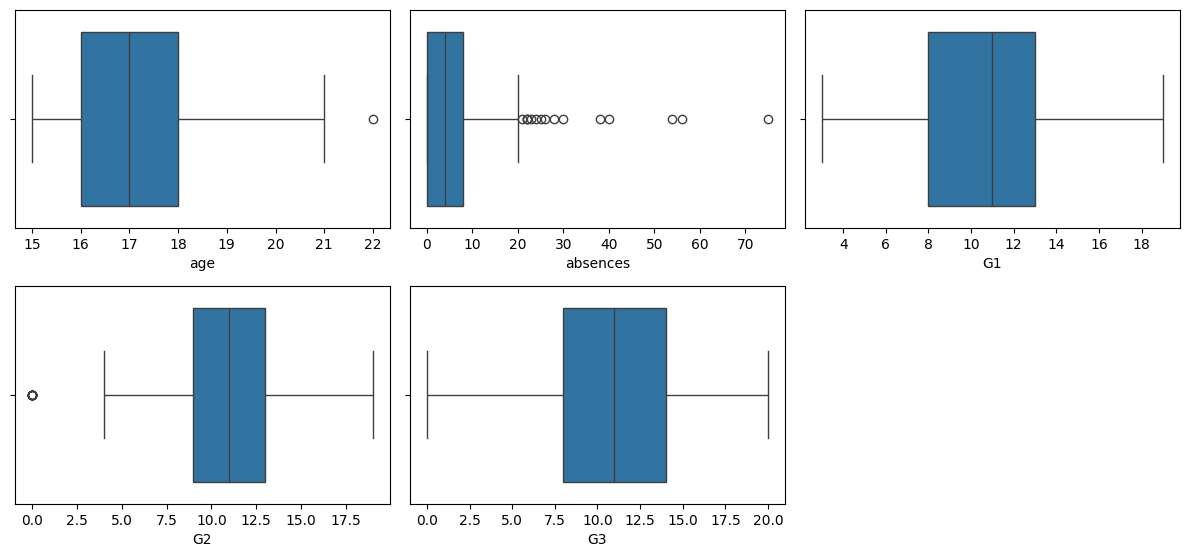

In [116]:
# Finding Outliers
plt.figure(figsize=(12,8))
o = 1
for j in cont:
  if o <=  9:
    plt.subplot(3,3,o)
    sns.boxplot(x = cont[j])
    plt.xlabel(j)
    o += 1
plt.tight_layout()
plt.show()

In [117]:
# Age Outlires
a_q1 = np.percentile(df['age'], 25)
a_q3 = np.percentile(df['age'], 75)
a_iqr = a_q3 - a_q1
a_upper_bound = a_q3 + 1.5 * a_iqr
a_lower_bound = a_q1 - 1.5 * a_iqr
df.loc[(df['age'] > a_upper_bound) | (df['age'] < a_lower_bound), 'age'] = df['age'].median()

In [118]:
# Absences Outliers
b_q1 = np.percentile(df['absences'], 25)
b_q3 = np.percentile(df['absences'], 75)
b_iqr = b_q3 - b_q1
b_upper_bound = b_q3 + 1.5 * b_iqr
b_lower_bound = b_q1 - 1.5 * b_iqr
df.loc[(df['absences'] > b_upper_bound) | (df['absences'] < b_lower_bound), 'absences'] = df['absences'].median()

In [119]:
# G1 Outliers
h_q1 = np.percentile(df['G1'], 25)
h_q3 = np.percentile(df['G1'], 75)
h_iqr = h_q3 - h_q1
h_upper_bound = h_q3 + 1.5 * h_iqr
h_lower_bound = h_q1 - 1.5 * h_iqr
df.loc[(df['G1'] > h_upper_bound) | (df['G1'] < h_lower_bound), 'G1'] = df['G1'].median()

**Splitting The Data**

In [120]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [121]:
#Defining Target Variabel
df['HighPerformer'] = (df['G3'] >= 10).astype(int)

In [122]:
# Deleting The Influencing Labels to prevent Data Data Leakage
df_cleaned = df.drop(['G3', 'G2', 'G1',], axis=1)

In [123]:
df_cleaned

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,HighPerformer
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,1
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,1


In [124]:
#Seperating The Categorical and Numerical Features
categorical_features = df_cleaned.select_dtypes(include=['object']).columns
numerical_features = df_cleaned.select_dtypes(exclude=['object']).columns.drop(['HighPerformer'])

In [125]:
# Defining The Features And Target Variabel
x = df_cleaned.drop(['HighPerformer'], axis=1)
y = df_cleaned[['HighPerformer']]

In [126]:
# Splitting The Data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [127]:
# Definig The Transformation & Scalling Techiniques

transformer = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
], remainder='passthrough')

In [128]:
# Applying The Transformation & Scalling Techiniques
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [129]:
# Get the feature names after transformation

feature_names = transformer.get_feature_names_out()
x_train_scaled = pd.DataFrame(x_train, columns=feature_names)

In [130]:
x_train_scaled.shape

(316, 39)

**Balancing The Imbalanced Data**

In [131]:

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train_scaled, y_train)

**Model Creation**

In [132]:
# Logistic Regression With Balanced Data
# Accuracy 68%

model = LogisticRegression()
model.fit(x_smote, y_smote)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.52      0.53        27
           1       0.75      0.77      0.76        52

    accuracy                           0.68        79
   macro avg       0.65      0.64      0.65        79
weighted avg       0.68      0.68      0.68        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Logistic Regression With Balanced Data**
- With Balanced Data The Accuracy Score Was Only 67%

In [133]:
# Logistic Regegression With Normal Data
# Accuracy 72%

model_1 = LogisticRegression()
model_1.fit(x_train_scaled, y_train)
y_predict = model_1.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.41      0.50        27
           1       0.74      0.88      0.81        52

    accuracy                           0.72        79
   macro avg       0.69      0.65      0.65        79
weighted avg       0.71      0.72      0.70        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [134]:
# Hyper Parameter Tunning for logistic regression
# Accuracy 75%

param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]

clf = GridSearchCV(model_1,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

best_clf = clf.fit(x_train_scaled,y_train)
clf_pred = clf.predict(x_test)
print(best_clf.best_estimator_)
print(classification_report(y_test, clf_pred))

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
LogisticRegression(C=np.float64(0.03359818286283781))
              precision    recall  f1-score   support

           0       0.82      0.33      0.47        27
           1       0.74      0.96      0.83        52

    accuracy                           0.75        79
   macro avg       0.78      0.65      0.65        79
weighted avg       0.76      0.75      0.71        79



/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

**Logistic Regression With Normal Data**
- With Normal Data The Accuracy Score Was 72%

In [135]:
# Decission Tree
# Accuracy 76%

dt = DecisionTreeClassifier(criterion='log_loss', max_depth=3, max_features=0.25, min_samples_leaf=3, min_samples_split=0.5)
dt.fit(x_train_scaled, y_train)
dt_pred = dt.predict(x_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.65      0.96      0.78        52

    accuracy                           0.63        79
   macro avg       0.32      0.48      0.39        79
weighted avg       0.43      0.63      0.51        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [136]:
# Decision Tree With Balanced Data
# Accuracy 76%

dt1 = DecisionTreeClassifier()
dt1.fit(x_smote, y_smote)
dt1_pred = dt.predict(x_test)
print(classification_report(y_test, dt1_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.65      0.96      0.78        52

    accuracy                           0.63        79
   macro avg       0.32      0.48      0.39        79
weighted avg       0.43      0.63      0.51        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [137]:
# Hyper Parameter Tunning For Decision Tree
# Accuracy 76%

param = {
    'max_depth':[2,3, 4,8,10,None],
    'criterion':['gini','entropy', 'log_loss'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

grid_search = GridSearchCV(dt, param_grid=param, n_jobs=-1, verbose=0, cv=3)
best_grid = grid_search.fit(x_train_scaled, y_train)
grid_pred = grid_search.predict(x_test)
print(grid_search.best_estimator_)
print(classification_report(y_test, grid_pred))

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=0.5,
                       min_samples_leaf=3, min_samples_split=0.25)
              precision    recall  f1-score   support

           0       0.70      0.26      0.38        27
           1       0.71      0.94      0.81        52

    accuracy                           0.71        79
   macro avg       0.71      0.60      0.59        79
weighted avg       0.71      0.71      0.66        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**The Best Parameters are:** (criterion='gini', max_depth=3, max_features=0.5, min_samples_leaf=3, min_samples_split=0.25)

In [138]:
# Random Forest
# Accuracy 68%
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)
rf_pred = rf.predict(x_test)
print(classification_report(y_test, rf_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.56      0.19      0.28        27
           1       0.69      0.92      0.79        52

    accuracy                           0.67        79
   macro avg       0.62      0.55      0.53        79
weighted avg       0.64      0.67      0.61        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [139]:
# Random Forest with parameter tunning
# Accuracy 66%
rf_pram = {
    'criterion':['gini','entropy', 'log_loss'],
    'max_depth':[2,3,4,8, 10, None],
    'min_samples_split':[0.25,0.5,1.0],
    'min_samples_leaf':[1,2,3],
    'min_weight_fraction_leaf':[0.25,0.5,1.0],
    'max_features':['sqrt', 'log2', None]

}
rf_grid = RandomizedSearchCV(estimator=rf, param_distributions=rf_pram, n_jobs=-1, verbose=0, cv=3)
best_rf = rf_grid.fit(x_train_scaled, y_train)
best_pred = rf_grid.predict(x_test)
print(best_rf.best_estimator_)
print(classification_report(y_test, best_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_leaf=2, min_samples_split=1.0,
                       min_weight_fraction_leaf=0.25)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.66      1.00      0.79        52

    accuracy                           0.66        79
   macro avg       0.33      0.50      0.40        79
weighted avg       0.43      0.66      0.52        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

In [140]:
# Random Forest With Balanced Data
# Accuracy 71%
rf1 = RandomForestClassifier(n_estimators=500)
rf1.fit(x_smote, y_smote)
rf1_pred = rf1.predict(x_test)
print(classification_report(y_test, rf1_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.67      0.30      0.41        27
           1       0.72      0.92      0.81        52

    accuracy                           0.71        79
   macro avg       0.69      0.61      0.61        79
weighted avg       0.70      0.71      0.67        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [141]:
#SVM With Normal Data
#Accuracy 72%

sv = SVC()
sv.fit(x_train_scaled, y_train)
sv_pred = sv.predict(x_test)
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

           0       0.78      0.26      0.39        27
           1       0.71      0.96      0.82        52

    accuracy                           0.72        79
   macro avg       0.75      0.61      0.60        79
weighted avg       0.74      0.72      0.67        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [142]:
# SVM with parameter tunning
# Accuracy 73%
param_grid_svc = {
    'C': [0.1, 1, 50],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4]
}

svm_grid = RandomizedSearchCV(estimator=sv, param_distributions=param_grid_svc, n_jobs=-1, verbose=0, cv=3)
best_svm = svm_grid.fit(x_train_scaled, y_train)
svm_pred = svm_grid.predict(x_test)
print(best_svm.best_estimator_)
print(classification_report(y_test, svm_pred))

SVC(C=1, degree=2, kernel='poly')
              precision    recall  f1-score   support

           0       0.67      0.30      0.41        27
           1       0.72      0.92      0.81        52

    accuracy                           0.71        79
   macro avg       0.69      0.61      0.61        79
weighted avg       0.70      0.71      0.67        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [143]:
# SVM With Balanced Data
# Accuracy 66%
sv1 = SVC()
sv1.fit(x_smote, y_smote)
sv1_pred = sv1.predict(x_test)
print(classification_report(y_test, sv1_pred))

              precision    recall  f1-score   support

           0       0.43      0.37      0.40        27
           1       0.70      0.75      0.72        52

    accuracy                           0.62        79
   macro avg       0.57      0.56      0.56        79
weighted avg       0.61      0.62      0.61        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [144]:
# KNN With Normal Data
# Accuracy 61%
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
knn_pred = knn.predict(x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.38      0.22      0.28        27
           1       0.67      0.81      0.73        52

    accuracy                           0.61        79
   macro avg       0.52      0.51      0.50        79
weighted avg       0.57      0.61      0.58        79



/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [145]:
# KNN With parameter tunning
# Accuracy 65%
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_grid, n_jobs=-1, verbose=0, cv=3)
best_knn = knn_grid.fit(x_train_scaled, y_train)
knn_pred = knn_grid.predict(x_test)
print(best_knn.best_estimator_)
print(classification_report(y_test, knn_pred))

KNeighborsClassifier(metric='euclidean', n_neighbors=11)
              precision    recall  f1-score   support

           0       0.46      0.22      0.30        27
           1       0.68      0.87      0.76        52

    accuracy                           0.65        79
   macro avg       0.57      0.54      0.53        79
weighted avg       0.61      0.65      0.60        79



/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [146]:
# KNN With Balanced Data
# Accuracy 52%

kn = KNeighborsClassifier()
kn.fit(x_smote, y_smote)
kn_pred = kn.predict(x_test)
print(classification_report(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.32      0.59      0.42        27
           1       0.62      0.35      0.44        52

    accuracy                           0.43        79
   macro avg       0.47      0.47      0.43        79
weighted avg       0.52      0.43      0.43        79



/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [147]:
# Gradient Boosting With Normal Data
# Accuracy 71%

gb = GradientBoostingClassifier()
gb.fit(x_train_scaled, y_train)
gb_pred = gb.predict(x_test)
print(classification_report(y_test, gb_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.62      0.37      0.47        27
           1       0.73      0.88      0.80        52

    accuracy                           0.71        79
   macro avg       0.68      0.63      0.63        79
weighted avg       0.69      0.71      0.69        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [148]:
# Gradient Boosting with parameter tunning
# Accuracy 67%
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

gb_grid = RandomizedSearchCV(estimator=gb, param_distributions=gb_param_grid, n_jobs=-1, verbose=0, cv=3)
best_gb = gb_grid.fit(x_train_scaled, y_train)
gb_pred = gb_grid.predict(x_test)
print(best_gb.best_estimator_)
print(classification_report(y_test, gb_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, subsample=0.9)
              precision    recall  f1-score   support

           0       0.75      0.11      0.19        27
           1       0.68      0.98      0.80        52

    accuracy                           0.68        79
   macro avg       0.72      0.55      0.50        79
weighted avg       0.70      0.68      0.59        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [149]:
# Gradient Boosting With Balanced Data
# Accuracy 67%
gb1 = GradientBoostingClassifier()
gb1.fit(x_smote, y_smote)
gb1_pred = gb1.predict(x_test)
print(classification_report(y_test, gb1_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.52      0.41      0.46        27
           1       0.72      0.81      0.76        52

    accuracy                           0.67        79
   macro avg       0.62      0.61      0.61        79
weighted avg       0.66      0.67      0.66        79



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [150]:
# XGB With Normal Data
# Accuracy 68%
xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)
xgb_pred = xgb.predict(x_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.56      0.37      0.44        27
           1       0.72      0.85      0.78        52

    accuracy                           0.68        79
   macro avg       0.64      0.61      0.61        79
weighted avg       0.66      0.68      0.66        79



In [151]:
# XGB with parameter tunning
# Accuracy 67%
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.001, 0.01]
}


xg_grid = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_jobs=-1, verbose=0, cv=3)
best_xg = xg_grid.fit(x_train_scaled, y_train)
xg_predict = xg_grid.predict(x_test)
print(best_xg.best_estimator_)
print(classification_report(y_test, xg_predict))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)
              precision    recall  f1-score   support

           0       0.62      0.19      0.29        27
           1       0.69      0.94      0.80        52

    accuracy                           0.68        79
   macro avg       0.66      

In [152]:
# XGB With Balanced Data
# Accuracy 71%
xgb1 = XGBClassifier(n_estimators=100)
xgb1.fit(x_smote, y_smote)
xgb1_pred = xgb1.predict(x_test)
print(classification_report(y_test, xgb1_pred))

              precision    recall  f1-score   support

           0       0.52      0.41      0.46        27
           1       0.72      0.81      0.76        52

    accuracy                           0.67        79
   macro avg       0.62      0.61      0.61        79
weighted avg       0.66      0.67      0.66        79

